Tests whether the method works for straight lines, and whether the method can descriminate between two different lines. 

In [1]:
import ipywidgets as ipw
from IPython.display import display
from matplotlib import pyplot as plt

from stochastic_models import model_lines
import stochastic_repro as sr
from stochastic_tests import Test

t_fin = 1.0
num_steps = 100

test1 = Test(model=model_lines(),
             t_fin=t_fin,
             num_steps=num_steps,
             sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
             trials=[10, 20],
             stochastic=False)
test2 = Test(model=model_lines(mods={'y': 2.0, 'z': 3.0}),
             t_fin=t_fin,
             num_steps=num_steps,
             sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
             trials=[10, 20],
             stochastic=False)

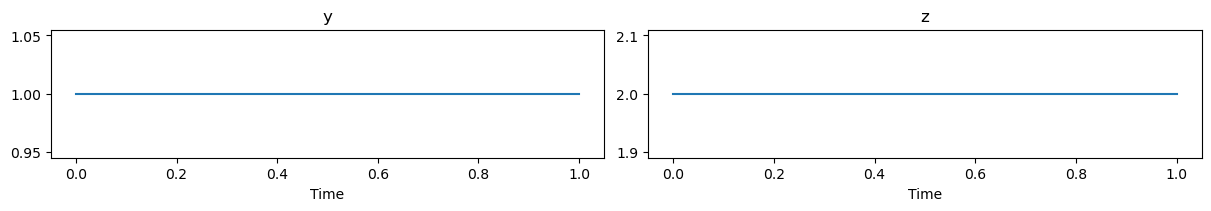

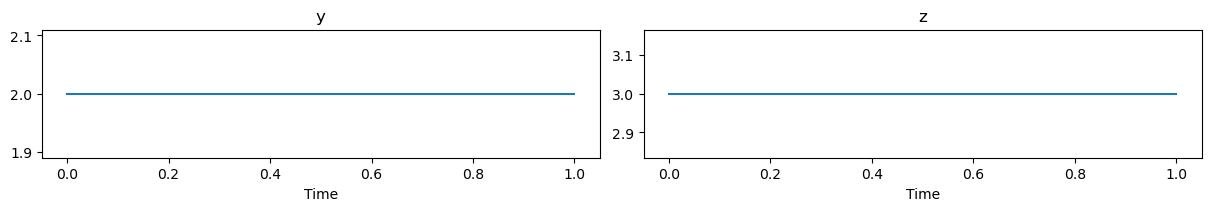

In [2]:
test1.execute_deterministic()
_ = test1.plot_results_deterministic()
test2.execute_deterministic()
_ = test2.plot_results_deterministic()

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

test1.execute_stochastic(label)
test2.execute_stochastic(label)
_ = out.clear_output()

Output()

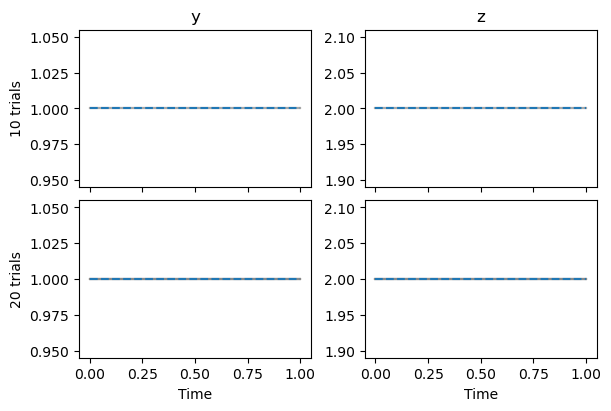

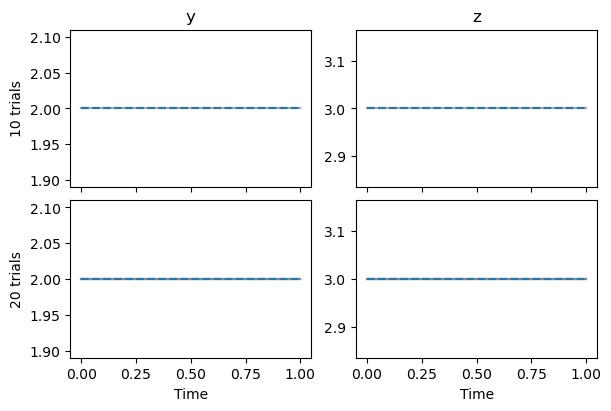

In [4]:
_ = test1.plot_results_stochastic()
_ = test2.plot_results_stochastic()

For straight lines, we calculate obvious probability distribution functions. 

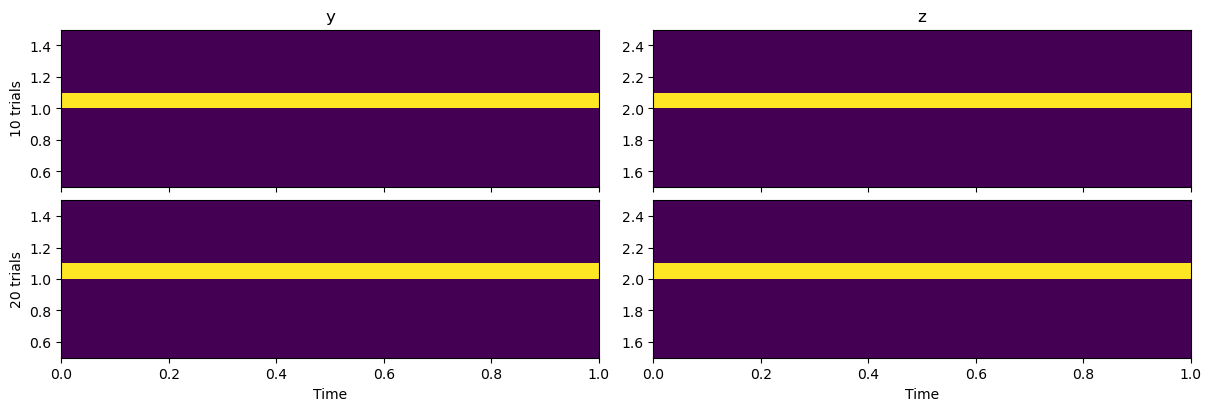

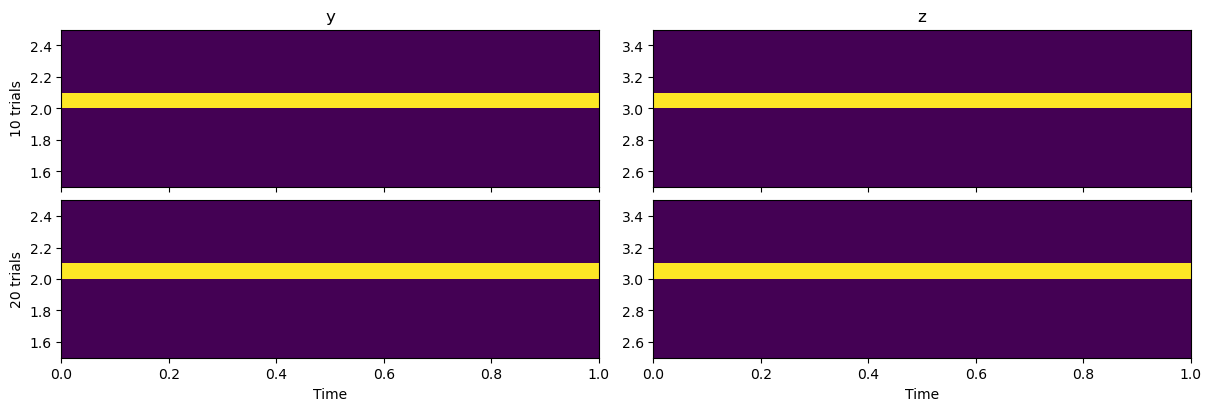

In [5]:
_ = test1.plot_distributions()
_ = test2.plot_distributions()

We find that different lines have different characteristic functions. 

/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_tests.py:494: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[i].set_yscale('log')
/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_repro.py:1123: RuntimeWarning: invalid value encountered in scalar divide
  err_curr = abs(ks_avg_next - ks_avg_curr) / ks_avg_curr
/Users/timothy.sego/miniconda3/envs/stoch_repro/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:945: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_repro.py:946: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)
/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_tests.py:518: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


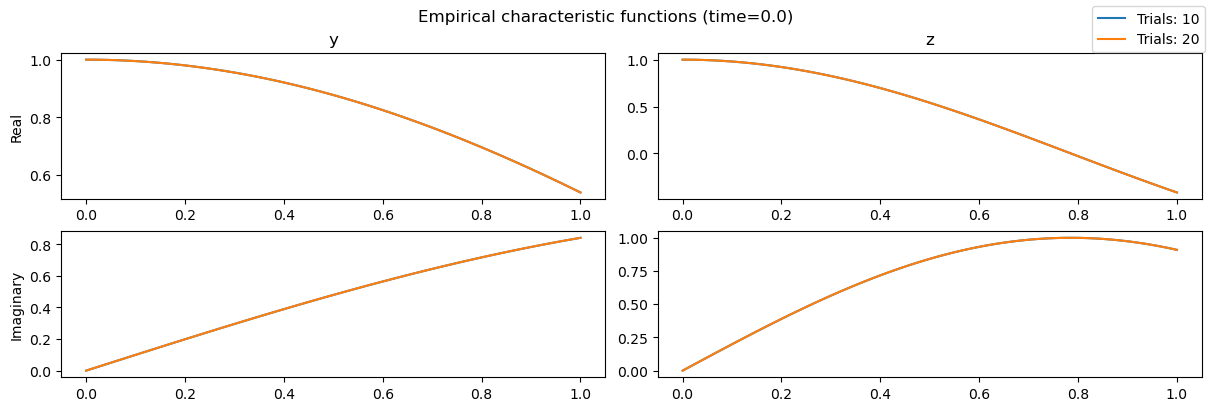

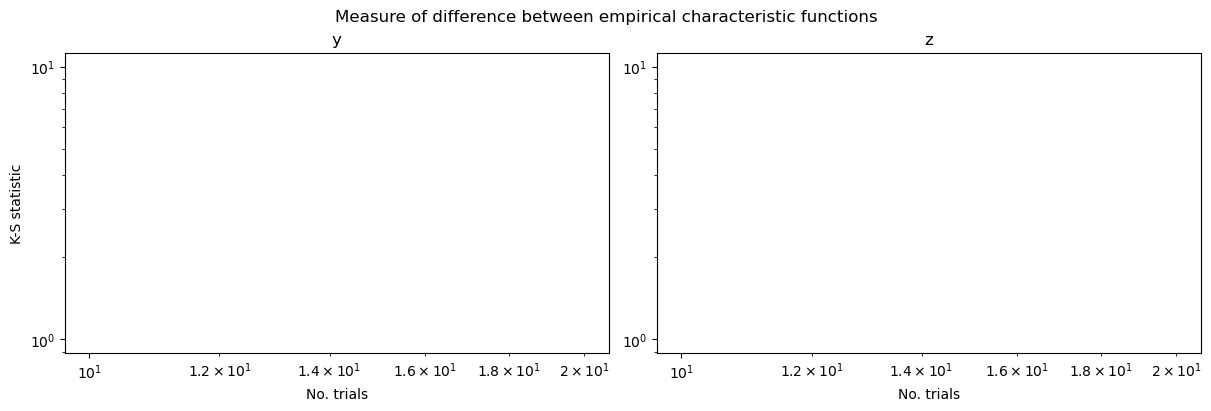

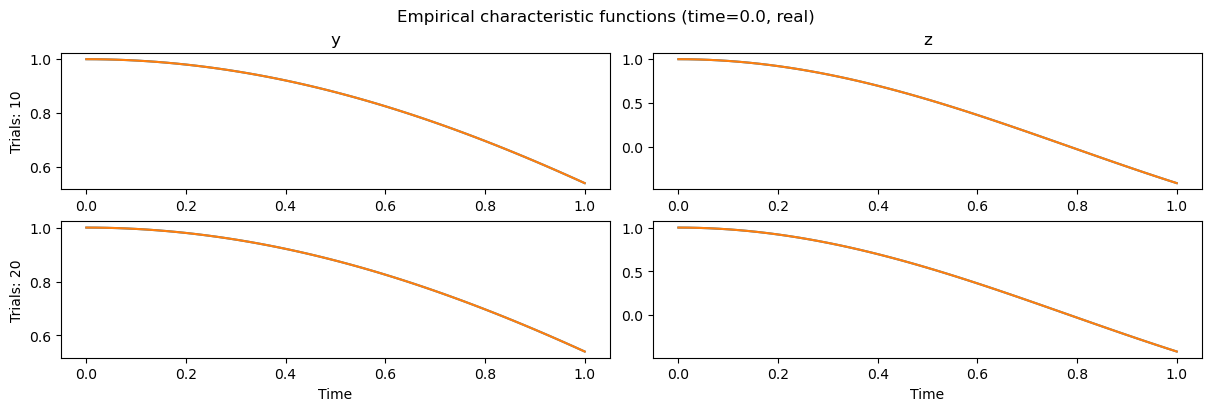

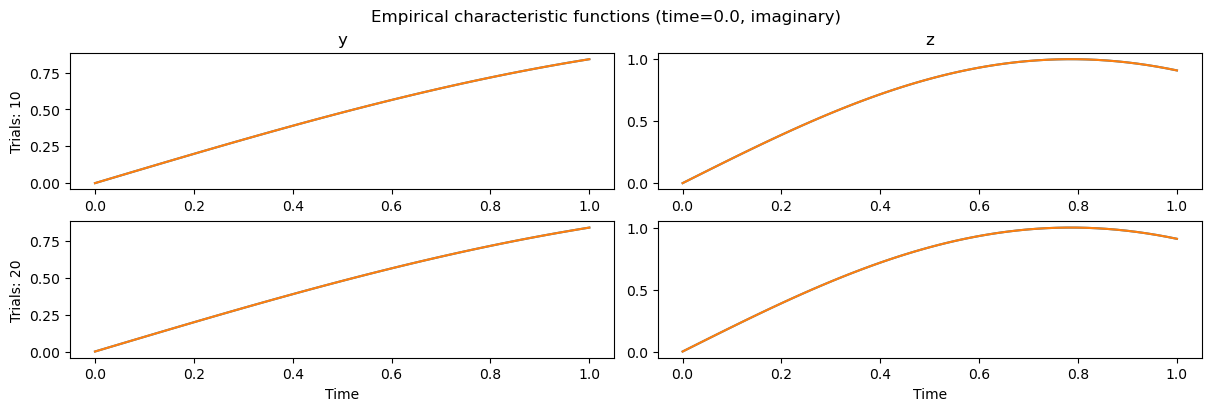

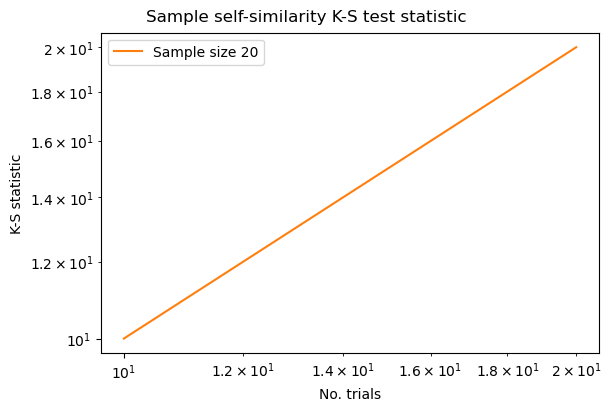

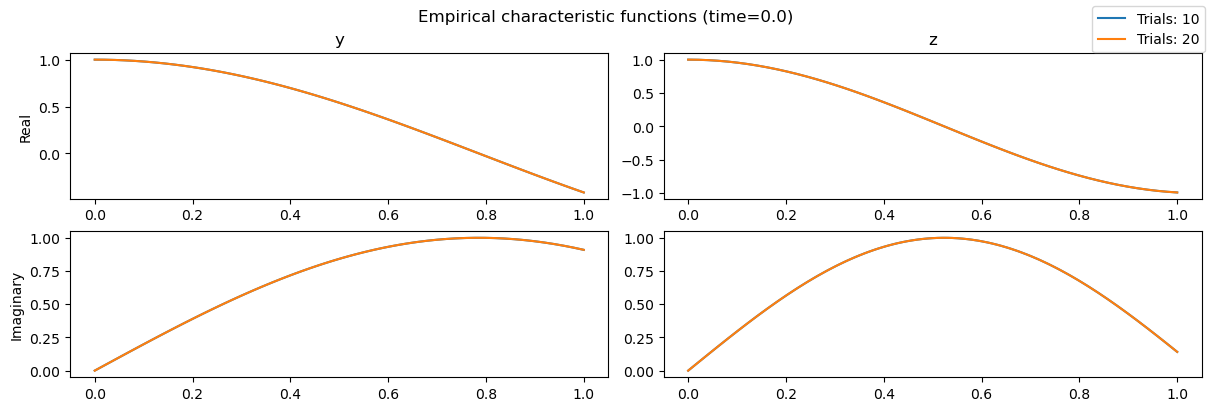

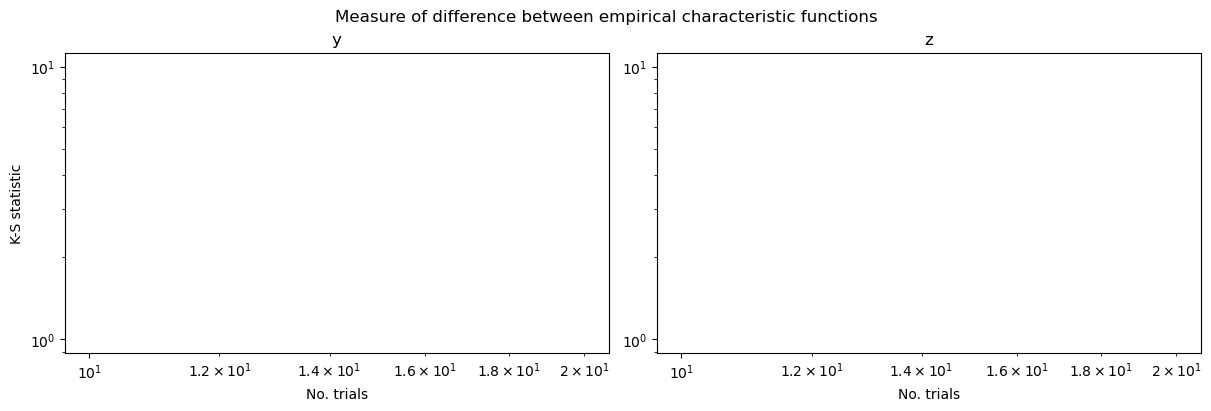

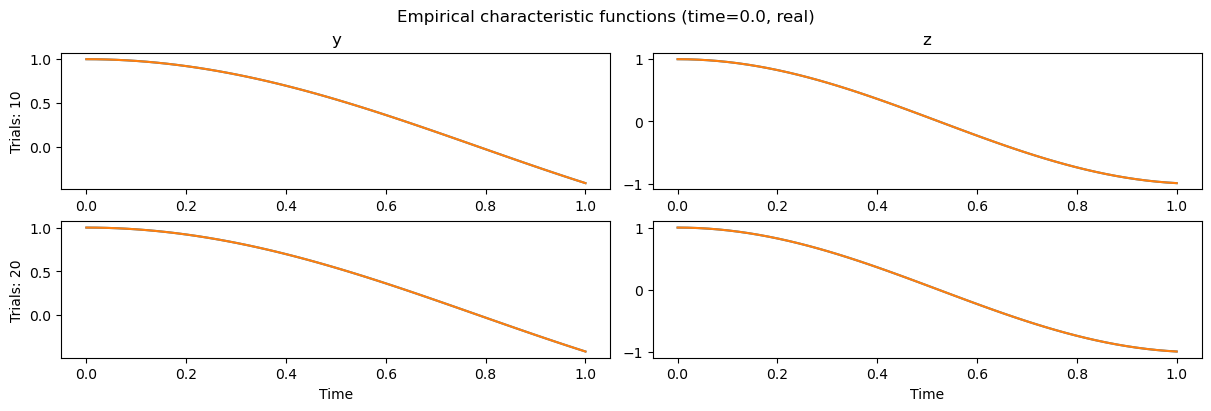

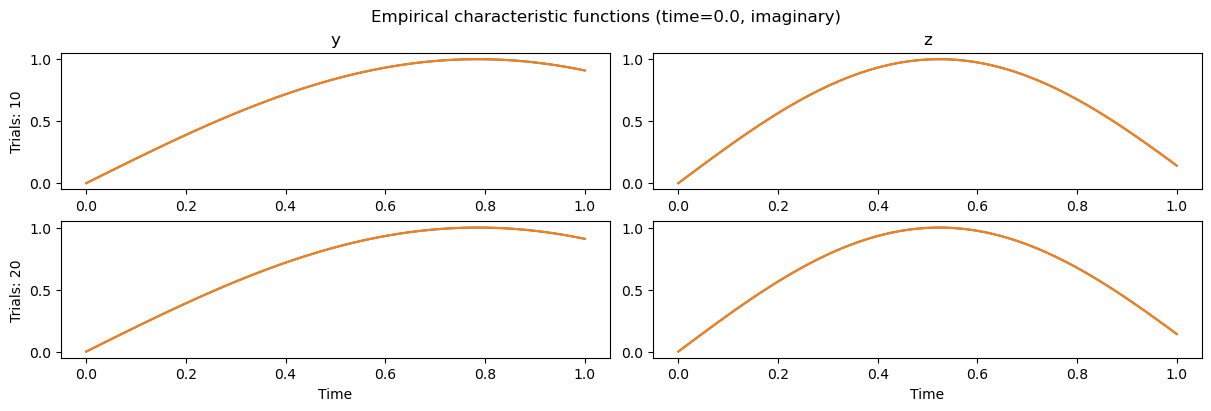

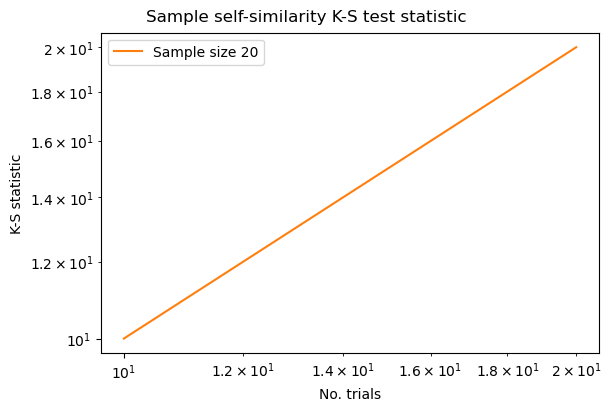

In [6]:
test1.find_ecfs()
test1.measure_ecf_diffs()
test1.plot_ecf(test1.max_ks_stat_time(test1.trials[-1]))
test1.plot_ecf_diffs()
test1.plot_ecf_comparison(test1.max_ks_stat_time(test1.trials[-1]))
test1.test_sampling(err_thresh=1E-3)
test1.generate_ecf_sampling_fits()
_, ax = test1.plot_ecf_sampling_fits(test1.plot_ecf_sampling())
_ = ax.legend()

test2.find_ecfs()
test2.measure_ecf_diffs()
test2.plot_ecf(test2.max_ks_stat_time(test2.trials[-1]))
test2.plot_ecf_diffs()
test2.plot_ecf_comparison(test2.max_ks_stat_time(test2.trials[-1]))
test2.test_sampling(err_thresh=1E-3)
test2.generate_ecf_sampling_fits()
_, ax = test2.plot_ecf_sampling_fits(test2.plot_ecf_sampling())
_ = ax.legend()

Comparing the converged ECF of the two models, we should find that they are always quantifiably different since their models have different parameters.

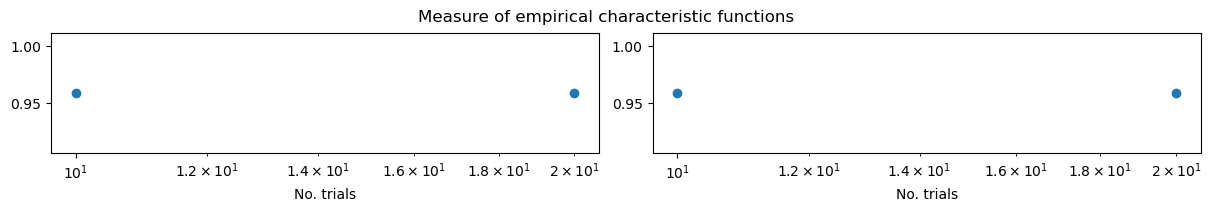

In [7]:
ecf_diff = sr.measure_ecf_diff_sets(test1.ecf, test2.ecf)

fig, ax = plt.subplots(1, len(test1.model.results_names), sharey=False, figsize=(12.0, 2.0), layout='compressed')
for i, name in enumerate(test1.model.results_names):
    ax[i].scatter(test1.trials, [max([el[name] for el in ecf_diff[trial]]) for trial in test1.trials])
    ax[i].set_xlabel('No. trials')
    ax[i].set_xscale('log')
_ = fig.suptitle('Measure of empirical characteristic functions')